# Car Price Prediction exploratory data analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import seaborn as sns 
sns.set()

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [5]:
print("There are",data.Model.value_counts().nunique(), "different models of cars in our dataset.")

There are 104 different models of cars in our dataset.


In [6]:
nc = data.Category.value_counts().nunique()
print("There are", nc,"unique categories:")
print(data.Category.value_counts())

There are 11 unique categories:
Sedan          8736
Jeep           5473
Hatchback      2847
Minivan         647
Coupe           532
Universal       364
Microbus        306
Goods wagon     233
Pickup           52
Cabriolet        36
Limousine        11
Name: Category, dtype: int64


<AxesSubplot:>

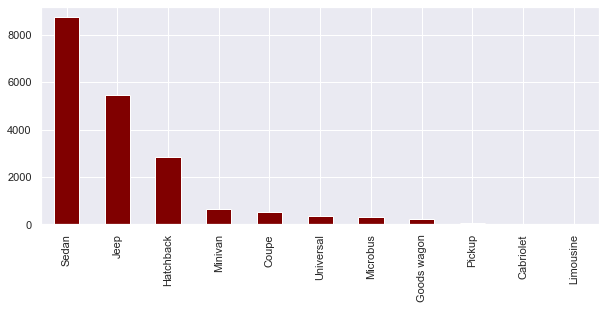

In [7]:
data.Category.value_counts().plot(kind = 'bar', figsize = (10, 4), color = 'maroon')

We can see that Sedans are the most popular category amongst car buyers in our dataset, followed by Jeeps and Hatchbacks. 

In [8]:
print("There are", data.Manufacturer.nunique(), "different manufacturers of cars in our data")
print("The different manufacturers we are looking into are:", data.Manufacturer.unique())

There are 65 different manufacturers of cars in our data
The different manufacturers we are looking into are: ['LEXUS' 'CHEVROLET' 'HONDA' 'FORD' 'HYUNDAI' 'TOYOTA' 'MERCEDES-BENZ'
 'OPEL' 'PORSCHE' 'BMW' 'JEEP' 'VOLKSWAGEN' 'AUDI' 'RENAULT' 'NISSAN'
 'SUBARU' 'DAEWOO' 'KIA' 'MITSUBISHI' 'SSANGYONG' 'MAZDA' 'GMC' 'FIAT'
 'INFINITI' 'ALFA ROMEO' 'SUZUKI' 'ACURA' 'LINCOLN' 'VAZ' 'GAZ' 'CITROEN'
 'LAND ROVER' 'MINI' 'DODGE' 'CHRYSLER' 'JAGUAR' 'ISUZU' 'SKODA'
 'DAIHATSU' 'BUICK' 'TESLA' 'CADILLAC' 'PEUGEOT' 'BENTLEY' 'VOLVO' 'სხვა'
 'HAVAL' 'HUMMER' 'SCION' 'UAZ' 'MERCURY' 'ZAZ' 'ROVER' 'SEAT' 'LANCIA'
 'MOSKVICH' 'MASERATI' 'FERRARI' 'SAAB' 'LAMBORGHINI' 'ROLLS-ROYCE'
 'PONTIAC' 'SATURN' 'ASTON MARTIN' 'GREATWALL']


In [9]:
data['Gear box type'].value_counts()

Automatic    13514
Tiptronic     3102
Manual        1875
Variator       746
Name: Gear box type, dtype: int64

<AxesSubplot:>

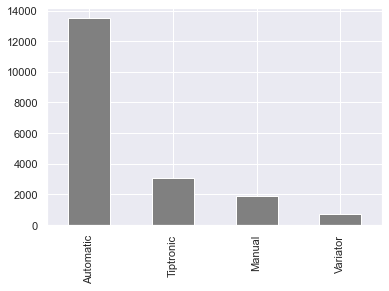

In [10]:
#Pie chart of Gear box type to show most popular choice
data['Gear box type'].value_counts().plot(kind = 'bar', color = 'grey')

The most popular Gear box type is an Automatic transmission, this may be because this is the easiest transmission to learn how to drive.

In [11]:
print("There are",data.Color.nunique(), "unique values in our dataset")
print(data.Color.value_counts())

There are 16 unique values in our dataset
Black            5033
White            4489
Silver           3792
Grey             2375
Blue             1396
Red               639
Green             322
Orange            253
Brown             187
Carnelian red     179
Golden            145
Beige             134
Sky blue          122
Yellow            106
Purple             39
Pink               26
Name: Color, dtype: int64


<AxesSubplot:ylabel='Color'>

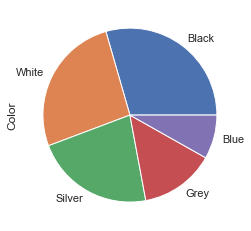

In [12]:
#Pie chart of top 5 most popular car colors
data.Color.value_counts().head(5).plot(kind = 'pie')

We can clearly see that Black is the most popular choice among car buyers, followed by White and then Silver.

In [13]:
print("The dataset covers cars manufactured over", data['Prod. year'].nunique(), "years from", data['Prod. year'].min(), "-", data['Prod. year'].max())
data['Prod. year'].value_counts()

The dataset covers cars manufactured over 54 years from 1939 - 2020


2012    2155
2014    2124
2013    1963
2011    1612
2015    1549
2010    1483
2016    1476
2017     959
2008     737
2009     601
2018     500
2007     464
2005     402
2003     367
2004     364
2006     317
2019     306
2002     296
2000     279
2001     254
1998     213
1999     207
1997     151
1996     114
1995     105
2020      47
1994      42
1992      30
1993      23
1990      18
1988      12
1991      10
1989       6
1986       6
1984       5
1985       5
1987       5
1953       4
1983       3
1939       3
1974       2
1965       2
1980       2
1964       2
1978       2
1977       2
1947       1
1981       1
1976       1
1943       1
1982       1
1957       1
1973       1
1968       1
Name: Prod. year, dtype: int64

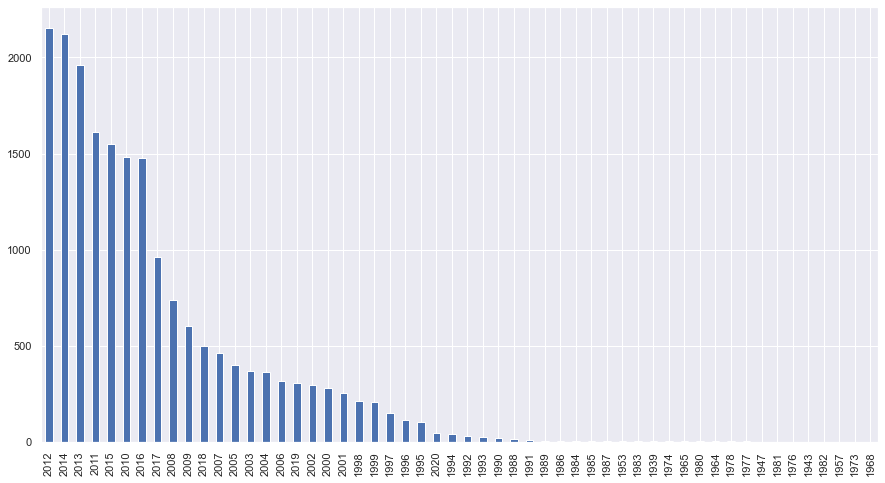

In [14]:
year = data['Prod. year'].value_counts().plot(kind = 'bar', figsize = (15, 8))

In [15]:
data['Drive wheels'].value_counts()

Front    12874
4x4       4058
Rear      2305
Name: Drive wheels, dtype: int64

<AxesSubplot:>

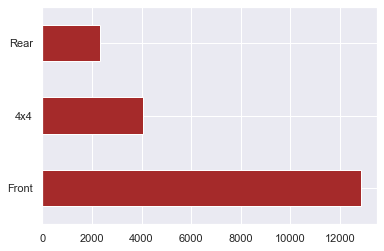

In [16]:
data['Drive wheels'].value_counts().plot(kind = 'barh', color = 'brown')

Front wheel drive is the seeing the highest sales. This may be due to the fact that Front wheel drive cars are easily driveable and in-town driving cars, eg. in Sedans(a popular in-city car), while 4x4 and Rear wheel drive cars are more expensive on an average and are used for off-roading.

In [17]:
data.Wheel.value_counts()

Left wheel          17753
Right-hand drive     1484
Name: Wheel, dtype: int64

<AxesSubplot:ylabel='Wheel'>

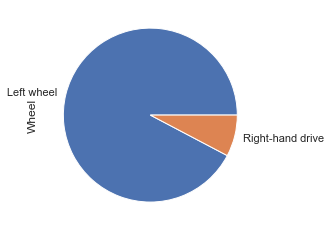

In [18]:
data.Wheel.value_counts().plot(kind = 'pie')

There is a very clear majority in the Left wheel drive cars since this dataset is primarily from the US region where they drive on the left hand side of the road and according to regulations cars are made to be left-wheel drive. Meanwhile, in India, according to regulation cars have right-hand drive.

In [19]:
print("There are",data['Fuel type'].nunique(), "different fuel types available in these cars.")
print(data['Fuel type'].value_counts())

There are 7 different fuel types available in these cars.
Petrol            10150
Diesel             4036
Hybrid             3578
LPG                 892
CNG                 494
Plug-in Hybrid       86
Hydrogen              1
Name: Fuel type, dtype: int64


<AxesSubplot:>

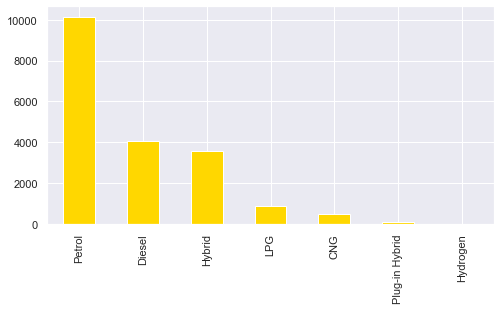

In [20]:
data['Fuel type'].value_counts().plot(kind = 'bar', figsize = (8, 4), color = 'gold')

Petrol is the most chosen fuel type. This is may be due to the fact that in the US, Petrol is cheaper than diesel. 

In [21]:
print("There are ", data['Engine volume'].nunique(), "different Engine volume capacities in our dataset")
#print(data['Engine volume'].unique())

There are  107 different Engine volume capacities in our dataset


### Exploring the relationship between variables

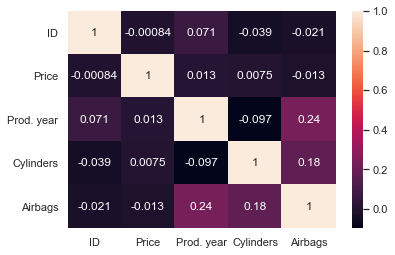

In [22]:
correlation = data.corr()
sns.heatmap(correlation, xticklabels = correlation.columns, yticklabels = correlation.columns, annot =True)
sns.set_style("whitegrid")

Price shows a negative correlation to airbags, a positive correlation to Prod. year and a very low postive correlation to Cylinders

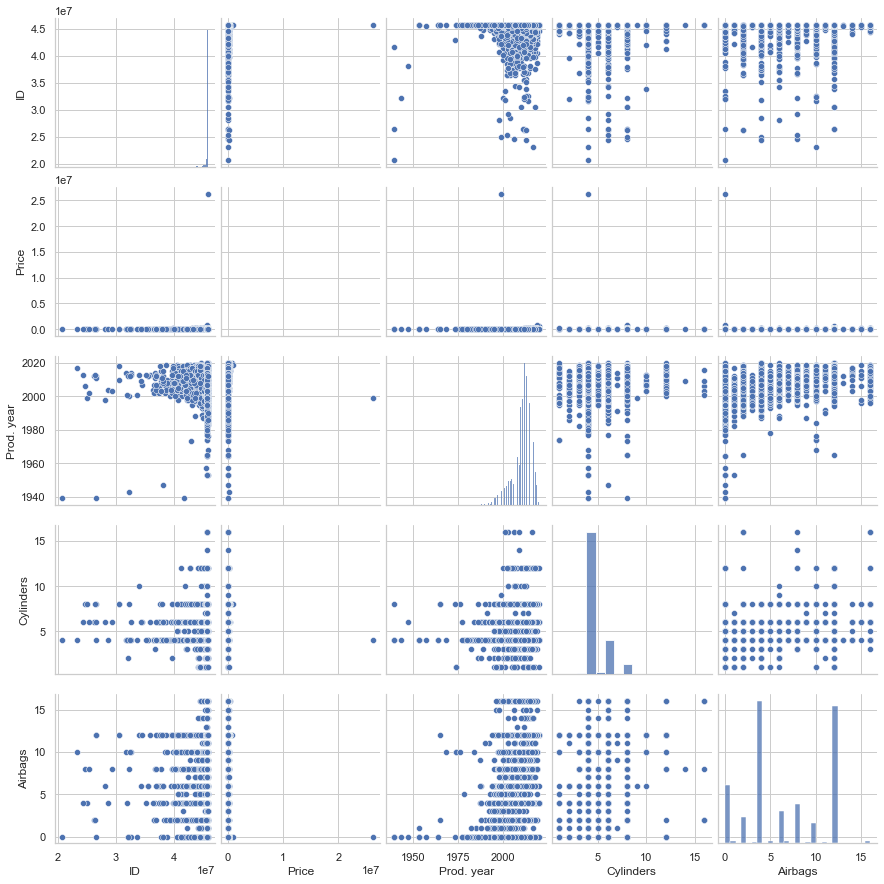

In [23]:
sns.pairplot(data, palette = 'bwr')

## Insights

In [24]:
df = data.copy()

### What is the average price of each car category?

In [25]:
print("The average car prices for each category is:")
df.groupby(by = 'Category')['Price'].mean()

The average car prices for each category is:


Category
Cabriolet       24583.694444
Coupe           21250.406015
Goods wagon    122916.180258
Hatchback       11381.245873
Jeep            23684.285949
Limousine       11534.454545
Microbus        18550.928105
Minivan         20531.221020
Pickup          28805.269231
Sedan           14231.545902
Universal       25253.700549
Name: Price, dtype: float64

<AxesSubplot:xlabel='Category'>

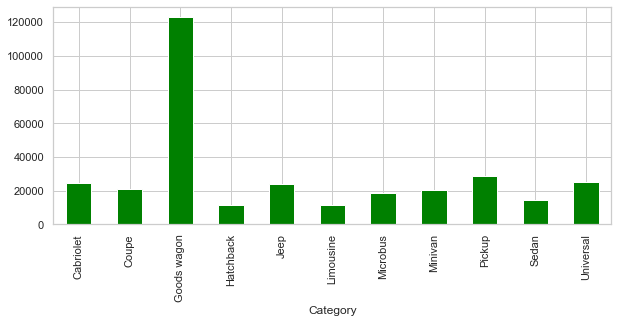

In [26]:
df.groupby(by = 'Category')['Price'].mean().plot(kind = 'bar', color = 'green', figsize = (10, 4))

The Goods Wagon is far more expensive on average than all the categories. While, the Hatchback and Sedan are among the most affordable category of cars to buy.